# Spotify Data Analysis Project

**By: Jeily Antigua**
*Date: May 2025*

---

### Objective:
The goal of this project is to explore trends in Spotify music data using Python. Through data cleaning, visualization, and statistical analysis, we uncover insights about genre popularity, song features, and audience preferences.

---

### Tools Used:
- Python (Pandas, Matplotlib, Seaborn)
- Jupyter Notebook
- GitHub (for version control and sharing)

---

### Dataset:
*The data set used in this analysis is the [Top Spotify songs from 2010-2019 - BY YEAR] (https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year)

- Track Name
- Artists
- Genre
- Popularity
- Duration (ms)
- Release Date
- Audio Features (danceability, energy, etc.)

This dataset allows for a focused analaysis on modern streaming trends from the last decade.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('top10s.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### Dataset Preview

In this dataset we are introduced to popular Spotify songs from years 2010 to 2019. Each row represents a song and contains metadata such as the title, artist, top genre, release year, and various audio feautres (e.g., bpm, tempo, danceability, and energy).

### The Table Key:
- **title**: Name of the song
- **artist**: Performer of the song
- **top genre**: Genre classification of the song
- **year**: Release year of the song
- **bpm**: Beats per minute (tempo of the song)
- **nrgy**: Energy level of the song (0-100)
- **dnce**: Danceability score of the song (0-100)
- **dB**: Loudness of the track in decibels; reflects overall volume
- **live**: Liveness score; reflects presence of audience in recording track (0-100)
- **val**: Valence; meausring the musical positiveness of a song. 0 representing seriousness, 100 representing cheerfullness
- **dur**: Duration in seconds
- **acous**: Acousticness (0-100). Higher scores suggest a more acoustic sound
- **spch**: Speechiness, indicating the prevalence of spoken words in the song
- **pop**: Popularity score on Spotify (0-100)

### Initial Observations:

- The dataset includes an 'Unnamed: 0' column, which is a redundant index and will be removed for clarity.
- - All audio feautures are ranged between 0 and 100 or similar ranges. However, its important to confirm the consistency of the units and check for missing values.
- Columns such as 'val,' 'acous,'spch,' and 'dB' will need further exploration to understand their relevance and distribution.

### Why these Features Matter:
- ***bpm**: Key for identifying tempo trends across genres and years.
- **pop**: Spotifys internal popularity socre; helps identify metrics that drives popular songs.
- **nrgy** & **dnce**: Key for evaluating playlist placement and virality of songs.

### Research Questions:
- Which genres were most dominant on Spotify betwen the years 2010 to 2019?
- How do feautures like energy and danceability correlate with song popularity?
- Are there notable trends in song characteristics?

### Next Steps:
- Begin initial data cleaning (drop unnecessary columns, check for null values).
- Generate exploratory data visuals portraying genre distributions and popularity trends.
- Conduct deeper analysis of audio features an their impact on song success.

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


### Initial Data Check Insights:

*df.info()* Findings:
- The dataset contains 603 entries across 15 columns.
- There are no missing (null) values. This means the dataset is complete.
- There are 12 numeric columns (int64), and 3 separate object type columns(title, artists, top genre).

*df.describe()* Findings:
- **year**: Covers a range from years 2010 to 2019.
- **bpm**: Ranges from 0 to 206 bpm with an average of 118.5 BPM. A bpm of zero may need to be checked as it could indicate missing data.
- **nrgy**: Average of ~70.5 signifying that most tracks are fairly energetic.
- **dnce**: Average of ~64 signifying that most tracks have moderate daceability.
- **dB**: Ranges from -60 to -2 dB. This is typical for audio files.
- **dur**: Track durations range from ~134 to ~424 seconds (2-7 minutes), aligning with standard song lengths. 
- **pop**: Popularity scores range from 0 to 99. The median is 69, signifying that the dataset skews towards popular tracks.

In [10]:
df.nunique()

Unnamed: 0    603
title         584
artist        184
top genre      50
year           10
bpm           104
nrgy           77
dnce           70
dB             14
live           61
val            94
dur           144
acous          75
spch           39
pop            71
dtype: int64

### Unique Values Analysis

*The 'df.nunique()' function helps evaluate the diversity of data across columns.*

### Observations:
- **title**: 584 different song titles out of 603 entries. This implies there are some repeated songs that are likely remixes.
- **artist**: 184 different artisits. This suggests some artists appear multiple times.
- **top genre**: 50 unique genres. This suggests that some generes may only have a few songs.
- **year**: 10 different years, spanning from 2010-2019.
- **bpm**: 104 distinct tempo values, showing a wide range of tempos.
- **dur**: 144 distinct durations, signifys a variety in song lengths.
- **pop**: 71 unique popularity scores. This signifies Spotify popularity metrics are well-distributed rather than clustered. This is important for trend analysis.

### Key Insights:
- The data set presents strong diversity across numerical and categorical fields, making it well-suited for exploratory and correlation analysis.

In [12]:
df = df.drop(columns=['Unnamed: 0']) 
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
df.duplicated().sum()
df = df.drop_duplicates()

In [16]:
df['top_genre'].value_counts()
df['year'].value_counts().sort_index()

year
2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
Name: count, dtype: int64

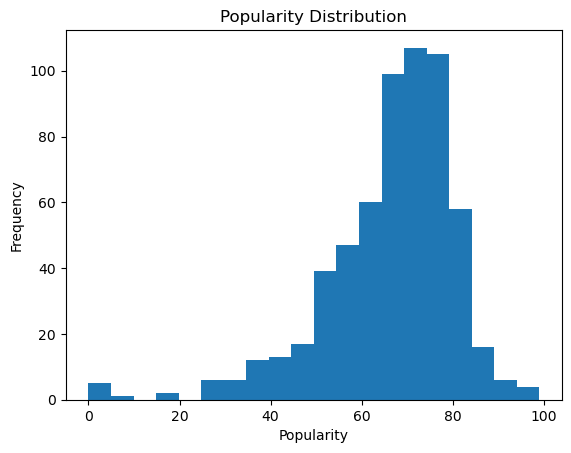

In [20]:
df['pop'].plot(kind='hist', bins=20, title='Popularity Distribution')
plt.xlabel('Popularity')
plt.show()

### Year & Genre Distribution
- **Genre counts**: Here we can see the dataset contains 50 unique genres, with some genres appearing more frequently than others. This suggests that while there is variety, a few dominant genres likely drive most of the data's trends.
- **Yearly distribution**: Track counts are relatively balanced across the 2010-2019 period, with **lower representation in 2012 and 2019**. This could be due to shifts in the popularity of streaming over time. In comparison, 2015-2017 show higher counts, which align with peak streaming years.

### Popularity Distribution Insights

The histogram visualizes the **distribution of popularity scores** (0-100 scale).

**Key Insights**:
- Most songs cluster between **60 and 80 popularity**, confirming that the dataset is skewed toward **moderately to highly popular tracks**.
- A smaller number of songs fall below 40, indicating **fewer low-popularity tracks** in this dataset.
- The distribution is slightly **right-skewed**, which is expected since the data set likely emphasizes well-known or chart-topping songs.

This distribution suggest that future analysis can focus on what differentiates mid-popularity from high-popularity tracks, especially in relation to their audio features.

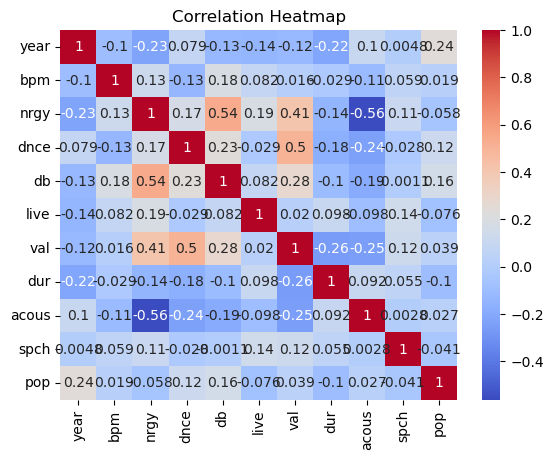

In [24]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Analysis
The correlation heatmap provides a visual overview of linear relationships between the data set's numerical features.

### Key Insights:

*Notable Positive Correlations*:
- **Energy('nrgy') & Loudness ('dB')**: Strong correlation of **0.54**, indicating that energetic songs tend to be louder. This aligns with current expectations in modern pop and dance music.
- **Danceability ('dnce') & Valence ('val')**: Moderate correlation of **0.50**, suggesting that more danceable tracks also tend to sound more positive or upbeat.

*Notable Negative Correlations*:
- **Acousticness ('acous') & Energy ('nrgy')**: Strong negative correlation of **-0.56**. This implies that acoustic tracks are less energetic.
- **Acousticness & Loudness**: Correlation of **0.51**, reinforcing the trend that acoustic songs are also quieter overall.

*Correlation with Popularity ('pop')*:
**All correlations with 'pop' are relatively weak**, with the highest being:
- Loudness ('dB'): 0.16
- Danceability ('dnce'): 0.12
- Valence ('val'): 0.04
This suggests that **no single audio feauture strongly predicts popularity** on its own. Popularity may be driven more by external factors like aritsts recognition, marketing, playlist placements, or social media influence.

### Key Takeaways:
While audio feautures help define a song's character, they alone don't determine success on Spotify. However, combinations of features (e.g., high danceability & high energy) may still play a role in identifying trends across popular songs.

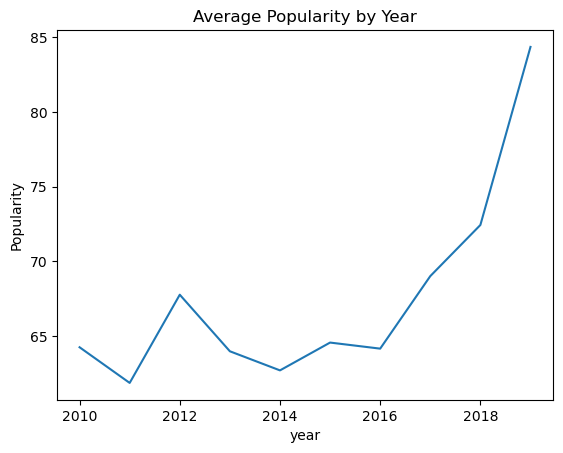

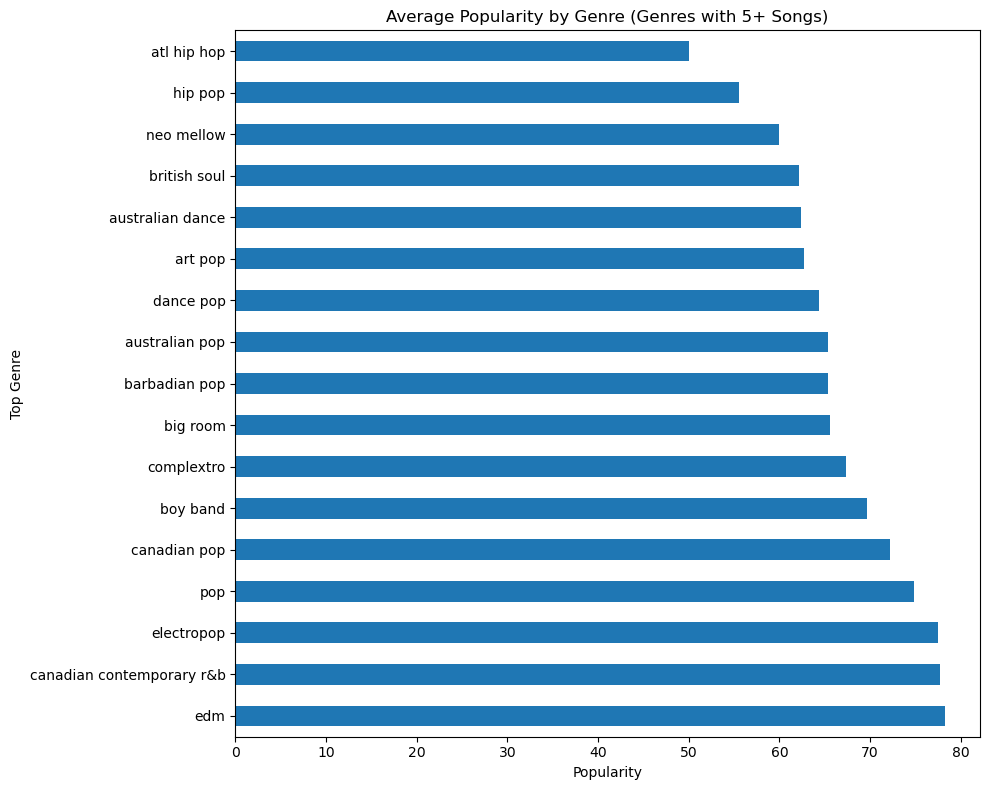

In [46]:
df.groupby('year')['pop'].mean().plot()
plt.title('Average Popularity by Year')
plt.ylabel('Popularity')
plt.show()

genre_counts = df['top_genre'].value_counts()
common_genres = genre_counts[genre_counts >=5].index
df_filtered = df[df['top_genre'].isin(common_genres)]

df_filtered.groupby('top_genre')['pop'].mean().sort_values(ascending=False).plot(kind='barh',figsize=(10,8))
plt.title('Average Popularity by Genre (Genres with 5+ Songs)')
plt.xlabel('Popularity')
plt.ylabel('Top Genre')
plt.tight_layout()
plt.show()

### Popularity Over Time

The line chart visualizing **average popularity by year** reveals a cruicial tree:

- Popularity remained relatively stable from **2010 to 2016**, with average scores fluctuating in the mid-60s range.
- A significant increase begins around **2017**, with popularity peaking sharply in **2019**.
- This trend may reflect changing listening behaviors like increased streaming, improvements in music promotion strategies, or the inclusion of more globally recognized hits in later years.

This upward trend suggests a growing emphasis on producing tracks that perform well on platforms like Spotify, especially in the late 2010s.

### Popularity by Genre (Filtered for 5+ Songs)

The horizontal bar chart portrays the **average popularity by genre**, only including genres that have **5 or more songs** in the data set to ensure statistical relevance.

Key insights:
- EDM, Canadian Contemporary R&B, and Electropop rank highest in popularity, indicating strong streaming appeal in upbeat, electronic-driven genres.
- Traditional genres like Hip Hop and Neo Mellow show lower average popularity, suggesting they may be underrepresented in this data set.
- Genres with strong digital presence and playlist compatibility (like Dance Pop and Pop) consistently rank higher than other genres.

This shows that while genre alone doesn't determine a song's success, certain genres tend to perform better in terms of popularity possibly due to broader listener appeal.

### Key Takeaway:
Temporal and genre-based trends reveal that recent songs and electronic or pop-adjacent genres tend to dominate in popularity. These findings help frame which musical features and genre affiliations might influence modern hit-making.

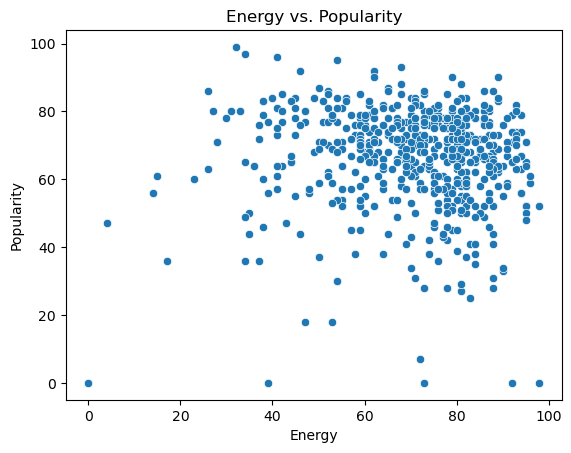

In [50]:
sns.scatterplot(data=df, x="nrgy", y='pop')
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

### Energy vs. Popularity

This scatterplot explores the relationship between a song's **energy level** and its **popularity score**.

### Observations:
- The data is densely clustered between 60 and 85 for energy, and between 60 and 80 for popularity.
- There is no strong linear correlation between energy and popularity, as also reflected in the correlation matrix (correlation coefficient = 0.12).

### Analysis:

While many popular songs tend to have **moderate to high energy**, energy alone isn't a strong predictor of popularity. Some high energy tracks score low on popularity, and some lower energy tracks are among the most popular. This suggests that while energy contributes to listener experience, other factors like genre, tempo, and valence, may play a more defining role in determining overall success.



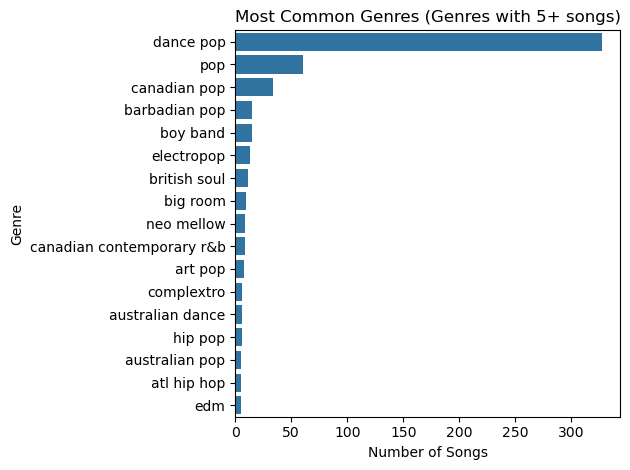

In [58]:
genre_counts = df['top_genre'].value_counts()
common_genres = genre_counts[genre_counts >=5].index
df_filtered = df[df['top_genre'].isin(common_genres)]

sns.countplot(y='top_genre', data=df_filtered, order=df_filtered['top_genre'].value_counts().index)
plt.title('Most Common Genres (Genres with 5+ songs)')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### Most Common Genres (Filtered for 5+ Songs)

This bar chart highlights the most frequently occuring genres in the data set, filtered to include only those with **at least 5 songs** to ensure relevance and statistical weight.

### Observations:
- Dance pop overwhelmingly dominates the data set, with more than 300 entries.
- Other genres like Pop, Canadian Pop, and Barbadian Pop appear but in smaller quantities.
- Many genres such as art pop, complextro, and australian dance just meet the 5-song threshold, indicative of a **long tail of underrepresnted genres**.

### Interpretation:

The strong presence of Fance Pop reflects its dominance in mainstream music during the 2010s, particularly on platforms like Spotify where radio-friendly songs often perform best. This also explains why Dance Pop consistently ranks high in earlier  visualizations of both frequence and average popularity. This apparent genre imbalance is an important factor to consider when interpretating genre-based trends. Some genre insights may be **influenced more by volume than popularity**.

### Final Insight:
By combining genre frequency with average popularity and correlation analysis, we see a fuller picture of what is driving song performance on Spotify. While audio features and genres contribute to a songs character, popularity is likely shaped by a mix of sound, timing, and external exposure like playlists, viral trends, or artist reputation.

### Project Conclusion

This analysis explored the **Spotify Top Tracks from 2010 to 2019**, focusing on trends in genre distribution, popularity, and audio features. By combining exploratory data analysis with visualizations and correlation metrics, several key insights emerged:

### Key Takeaways:
- *Dance Pop* dominates the dataset in both frequency and popularity, highlighting its central role in mainstream music during the 2010s.
- While audio features like *energy, danceability, and valence* shape a song's mood, none of them alone showed strong correlation with popularity. This suggests that musical success is multifactorial.
- *Popularity has trended upward over time*, with a noticeable spike in 2019. This could be due to platform growth, better algorithmic strategies, or more curated playlists.
- *Genres with high energy and a strong digital presence*, such as EDM and Electropop, consistently performed well in popularity metrics.
- The *correlation matrix and feature specific scatter plots*, reveal that audio features contribute to song character but not necessarily success. Its important to highlight the contribution of external factors like marketing and artist reach.

### Final Thoughts:
This project demonstrates how data analytics can provide a deeper understanding of musical trends, even when some drivers of success (like social influence) aren't captured directly in the data. Future data sets could incorporate additional variables such as playlist inclusion, artist monthly listeners, or social media engagement to build predictive models for popularity.